# Моделирование эпидемии по модели SIR

Простейшая модель для моделирования эпидемий называется **SIR**, поскольку в ней рассматриваются следующие переменные:

* $S(t)$ - **Susceptible** - потенциально способные заразиться люди
* $I(t)$ - **Infected** - зараженные
* $R(t)$ - **Recovered** - выздоровевшие

Мы рассматриваем эти значения как функции от времени. Модель **SIR** предполагает, что поведение этих величин описывается следующими уравнениями:

$$
\begin{array}{ll}
\frac{dS}{dt} & = -\frac{\beta SI}{N} \cr
\frac{dI}{dt} & = \frac{βSI}{N}−γI \cr
\frac{dR}{dt} & =γI
\end{array}
$$

Данный пример адаптирован из книги *Christian Hill. Learning Scientific Programming with Python. -- Cambridge University Press, ISBN: 9781107428225*, в электронном виде доступно [здесь](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

Для решения диф.уравнений используем пакет `odeint` из `scipy`.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Зададим начальные параметры города:

In [35]:
# Население, N.
N = 12000000
# Начальное число заболевших и выздоровевших, I0 and R0.
I0, R0 = 100, 0
# Все остальные (S0) потенциально восприимчивы
S0 = N - I0 - R0

# Коэфициент заразности beta и среднее время выздоровления gamma (в 1/день).
beta, gamma = 0.2, 1./20

# Число дней для расчета:
days = 160

Опишем расчетную сетку, на которой будем проводить вычисления (в днях) 

In [3]:
t = np.linspace(0, days, days)

Опишем функцию, стоящую в правой части уравнения. Будем считать, что вектор `y` состоит из трех рассматриваемых переменных S, I и R:

In [4]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Задаём начальный вектор и решаем уравнение с помощью `odeint`:

In [5]:
# Вектор начальных значений
y0 = S0, I0, R0
# Решаем уравнения SIR на временной сетке `t`
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

Нам осталось построить графики:

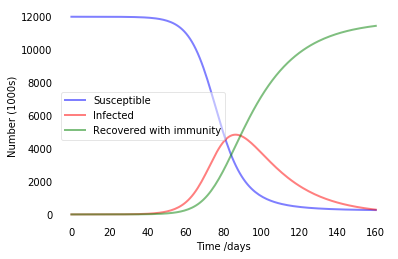

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Смотрим на реальную статистику по заболевшим

In [25]:
import pandas as pd
df = pd.read_csv('Data_Moscow.csv')
df[["Delta_Infected", "Delta_Recovered","Delta_Fatalities"]] = df[["Delta_Infected", "Delta_Recovered","Delta_Fatalities"]].apply(pd.to_numeric)
df["Date"] = pd.to_datetime(df["Date"],format="%d.%m.%y")
df.head(5)

,Date,Delta_Infected,Delta_Recovered,Delta_Fatalities
0,2020-03-01,0,0,0
1,2020-03-02,0,0,0
2,2020-03-03,0,0,0
3,2020-03-04,0,0,0
4,2020-03-05,0,0,0


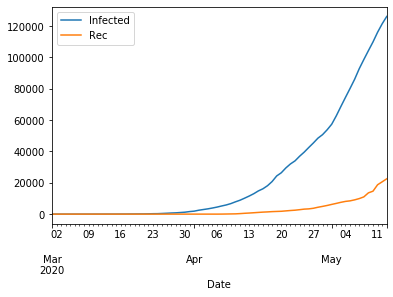

In [26]:
df["Infected"] = df["Delta_Infected"].cumsum()
df["Recovered"] = df["Delta_Recovered"].cumsum()
df["Fatalities"] = df["Delta_Fatalities"].cumsum()
df["Rec"] = df["Recovered"] + df["Fatalities"]
df.plot('Date',['Infected','Rec'])

In [27]:
df.head(20)

,Date,Delta_Infected,Delta_Recovered,Delta_Fatalities,Infected,Recovered,Fatalities,Rec
0,2020-03-01,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0
2,2020-03-03,0,0,0,0,0,0,0
3,2020-03-04,0,0,0,0,0,0,0
4,2020-03-05,0,0,0,0,0,0,0
5,2020-03-06,5,0,0,5,0,0,0
6,2020-03-07,0,0,0,5,0,0,0
7,2020-03-08,0,0,0,5,0,0,0
8,2020-03-09,3,0,0,8,0,0,0
9,2020-03-10,3,0,0,11,0,0,0


In [84]:
I0 = df.iloc[18]["Infected"]
start_date = df.iloc[18]["Date"]
df["Day"] = (df["Date"]-start_date).apply(lambda d : d.days)
ndf = df.iloc[18:].copy()
days = df['Day'].max()
ndf.head(1000)

,Date,Delta_Infected,Delta_Recovered,Delta_Fatalities,Infected,Recovered,Fatalities,Rec,Day,Infected_Pre
18,2020-03-19,12,0,0,98,0,0,0,0,9.800000e+01
19,2020-03-20,33,0,0,131,0,0,0,1,1.244915e+02
20,2020-03-21,6,0,0,137,0,0,0,2,1.581441e+02
21,2020-03-22,54,0,0,191,0,0,0,3,2.008934e+02
22,2020-03-23,71,0,0,262,0,0,0,4,2.551984e+02
23,2020-03-24,28,0,0,290,0,0,0,5,3.241823e+02
24,2020-03-25,120,0,0,410,0,0,0,6,4.118126e+02
25,2020-03-26,136,0,0,546,0,0,0,7,5.231290e+02
26,2020-03-27,157,0,0,703,0,0,0,8,6.645326e+02
27,2020-03-28,114,0,0,817,0,0,0,9,8.441541e+02


In [87]:
t = np.linspace(0,days+1,days+1)

def sol(ndf,beta):
    y0 = N-I0,I0,0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    ndf.loc[:,"Infected_Pre"] = list(I)
    ndf["Diff"] = np.square(ndf["Infected"]-ndf["Infected_Pre"])
    return ndf.iloc[:40]["Diff"].sum()
    
err = sol(ndf,0.2)
print("Error = ",err)
ndf.head()

Error =  2080253411.2250006


,Date,Delta_Infected,Delta_Recovered,Delta_Fatalities,Infected,Recovered,Fatalities,Rec,Day,Infected_Pre,Diff
18,2020-03-19,12,0,0,98,0,0,0,0,98.000000,0.000000
19,2020-03-20,33,0,0,131,0,0,0,1,114.170496,283.232203
20,2020-03-21,6,0,0,137,0,0,0,2,133.009153,15.926857
21,2020-03-22,54,0,0,191,0,0,0,3,154.956204,1299.155216
22,2020-03-23,71,0,0,262,0,0,0,4,180.524511,6638.255321


Error = 835359971.3410895
Beta = 0.2105


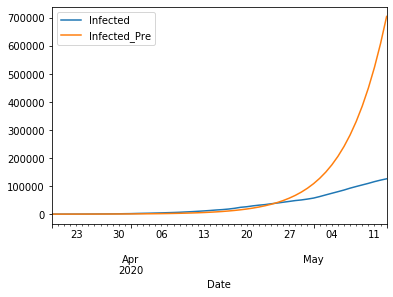

In [90]:
mn = 1000000000
for b in range(1000):
    beta = b/2000
    err = sol(ndf,beta)
    if err<mn:
        mn = err
        the_beta = beta
sol(ndf,the_beta)
print("Error = {}\nBeta = {}".format(mn,the_beta))
ndf.plot('Date',['Infected','Infected_Pre'])